<p style="background-color:plum; color:floralwhite; font-size:200%; text-align:center; border-radius:10px 10px; font-family:newtimeroman; line-height: 1.4; font-weight:bold;">Statistics with Python</p>

<p style="background-color:romance; color:plum; font-size:150%; text-align:center; border-radius:10px 10px; font-family:newtimeroman; line-height: 1; font-weight:bold;">ASSIGNMENT (HYPOTHESIS TESTS)</p>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Statistics functions
from scipy import stats
from scipy.stats import norm
import statistics as st

import warnings
# Suppressing a warning 
warnings.filterwarnings("ignore") 
warnings.warn("this will not show")

<p>
    <img src='https://i.ibb.co/FWvxFXv/x-Population-Samples-Notation.png' alt='Notation' width=500 style='display: inline-block;'>
    <img src='https://i.ibb.co/VvmXtf5/CI-Estimation.png' alt='ci-limit' width=300 style='display: inline-block;'>
    <img src='https://i.ibb.co/J28SJB0/CI-Commonly-Levels.png' alt='z-value' width=400 style='display: inline-block;'>
    <img src='https://i.ibb.co/R72p9p1/CI-t-distribution.png' alt='t-value' width=400 style='display: inline-block;'>
</p>

## EXERCISE 1

The hourly wages in a particular industry are normally distributed with mean \\$13.20 and standard deviation \\$2.50. A company in this industry employs 40 workers, paying them an average of \\$12.20 per hour. Can this company be accused of paying substandard wages? Use an α = .01 level test. (Wackerly, Ex.10.18)

CHECK: statistic: -2.5298221281347035, pvalue= 0.005706018193000826

In [2]:
xbar   = 12.20   # sample mean = np.mean(sample)
sigma  = 2.50    # population standard deviation
n      = 40      # random sample size n = len(sample)
mu     = 13.20   # population mean

Can this company be accused of paying substandard wages?
- H0: mu = 13.20
- H1: mu < 13.20

In [3]:
sem = sigma / np.sqrt(n)   # standard error of the mean
sem

0.3952847075210474

In [4]:
#compute test statistic
# z = (xbar-mu) / (sigma/np.sqrt(n))
z = (xbar-mu) / (sem)
z

-2.5298221281347035

In [5]:
#set alpha

# 99% confidence interval
# alpha = 1-CI = 1-0.99
alpha = 0.01
alpha

0.01

In [6]:
# p_value = 1 - norm.cdf(z) gives wrong value
p_value = 1 - norm.cdf(np.abs(z))
p_value

0.005706018193000872

In [7]:
#calculate the z_a/2, by using percent point function of the norm of scipy
#ppf = percent point function, inverse of CDF(comulative distribution function)
#also, CDF = pr(X<=x), i.e., probability to the left of the distribution
#this returns a value for which the probab to the left is 0.975

#The .ppf() function calculates the probability for a given normal distribution value,
#while the .cdf() function calculates the normal distribution value for which a given probability is the required value.
#These are inverse of each other in this particular sense.

# z_(alpha/2) = 1.645
z_critical = norm.ppf(1-alpha/2)  
z_critical

2.5758293035489004

In [8]:
print('mean :', xbar)
print('z : ',z)
print('z_critical :', z_critical, '\n')

#test the hypothesis
if p_value < alpha:
    print("REJECT THE NULL HYPOTHESIS : \n p-value = ", p_value, "\n Alpha = ", alpha)
else:
    print("FAIL TO REJECT THE NULL HYPOTHESIS. NOT ENOUGH EVIDENCE TO REJECT IT: \n p-value = ", p_value, "\n Alpha = ", alpha)
    
print()  

#test the hypothesis
if z < z_critical:
    print("REJECT THE NULL HYPOTHESIS : \n p-value = ", p_value, "\n Alpha = ", alpha)
else:
    print("FAIL TO REJECT THE NULL HYPOTHESIS. NOT ENOUGH EVIDENCE TO REJECT IT: \n p-value = ", p_value, "\n Alpha = ", alpha)

mean : 12.2
z :  -2.5298221281347035
z_critical : 2.5758293035489004 

REJECT THE NULL HYPOTHESIS : 
 p-value =  0.005706018193000872 
 Alpha =  0.01

REJECT THE NULL HYPOTHESIS : 
 p-value =  0.005706018193000872 
 Alpha =  0.01


In [9]:
stats.norm.interval(
    alpha=0.01,      #confidence level
    loc=xbar,        #sample mean
    scale=sem        #standard error of the mean
)

(12.195045711171279, 12.20495428882872)

In [10]:
# General Formula Confidence Intervals
# Point Estimate +_ (Critical Value)*(Standard Error)
moe = z_critical * sem
lower = xbar - moe
upper = xbar + moe

lower, upper

(11.181814067122529, 13.21818593287747)

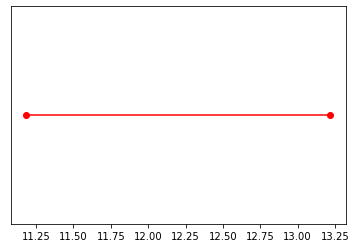

In [11]:
plt.plot((lower,upper), (1, 1), 'ro-',color='red')
plt.yticks(range(1),["CI 95%"]);

## EXERCISE 2
Shear strength measurements derived from unconfined compression tests for two types of soils gave the results shown in the following document (measurements in tons per square foot). Do the soils appear to differ with respect to average shear strength, at the 1% significance level?

[Results for two type of soils](https://docs.google.com/spreadsheets/d/1f2odmgDboIVuSV-A5gmuC25ppqQ5g1OIIF4h5EOqUcI/edit#gid=0)

CHECK: statistic: 5.1681473319343345, pvalue= 2.593228732352821e-06

In [12]:
Soil1 = np.array([1.442, 1.943, 1.11, 1.912, 1.553, 1.641, 1.499, 1.347, 1.685, 1.578, 1.866, 1.653, 1.665, 1.64, 1.976, 
                  1.754, 1.589, 1.976, 1.863, 1.932, 1.57, 1.613, 2.054, 1.55, 1.714, 1.896, 1.737, 1.74, 1.708, 1.548])

Soil2 = np.array([1.364, 1.878, 1.337, 1.828, 1.371, 1.428, 1.119, 1.373, 1.589, 1.714, 1.26, 1.492, 1.395, 1.778, 1.611, 
                  1.202, 1.542, 1.094, 1.557, 1.053, 1.183, 1.367, 1.144, 1.151, 1.561, 1.192, 1.489, 1.379, 1.501, 1.277, 
                  1.593, 1.172, 1.51, 1.74, 1.355])

print(Soil1, Soil2, sep='\n\n')

[1.442 1.943 1.11  1.912 1.553 1.641 1.499 1.347 1.685 1.578 1.866 1.653
 1.665 1.64  1.976 1.754 1.589 1.976 1.863 1.932 1.57  1.613 2.054 1.55
 1.714 1.896 1.737 1.74  1.708 1.548]

[1.364 1.878 1.337 1.828 1.371 1.428 1.119 1.373 1.589 1.714 1.26  1.492
 1.395 1.778 1.611 1.202 1.542 1.094 1.557 1.053 1.183 1.367 1.144 1.151
 1.561 1.192 1.489 1.379 1.501 1.277 1.593 1.172 1.51  1.74  1.355]


In [13]:
df = pd.read_csv("soil - Sheet1.csv")
df.head()

,Soil1,Soil2
0,1.442,1.364
1,1.943,1.878
2,1.110,1.337
3,1.912,1.828
4,1.553,1.371


In [14]:
df.Soil1.mean(), df.Soil2.mean()

(1.6918, 1.4171142857142855)

In [15]:
indTest = stats.ttest_ind(Soil1, Soil2, equal_var=True, alternative='two-sided')
indTest

Ttest_indResult(statistic=5.1681473319343345, pvalue=2.593228732352821e-06)

In [16]:
indTest = stats.ttest_ind(df.Soil1.dropna(), df.Soil2, equal_var=True, alternative='two-sided')
indTest

Ttest_indResult(statistic=5.1681473319343345, pvalue=2.593228732352821e-06)

In [17]:
indTest.statistic, indTest.pvalue

(5.1681473319343345, 2.593228732352821e-06)

In [18]:
alpha = 0.01

if indTest.pvalue < alpha:
    print("Reject the null")
else:
    print("fail to reject the null")

Reject the null


## EXERCISE 3
The following dataset is based on data provided by the World Bank (https://datacatalog.worldbank.org/dataset/education-statistics). World Bank Edstats. [2015 PISA Test Dataset](https://docs.google.com/spreadsheets/d/14rVnIUfEm3CuK9bSvS5253RHWzQhXOuNc0I-cCkgpR8/edit?usp=sharing)

01. Get descriptive statistics (the central tendency, dispersion and shape of a dataset’s distribution) for each continent group (AS, EU, AF, NA, SA, OC).
02. Determine whether there is any difference (on the average) for the math scores among European (EU) and Asian (AS) countries (assume normality and equal variances). Draw side-by-side box plots.

CHECK: statistic=0.870055317967983, pvalue=0.38826888111307345

In [19]:
df = pd.read_csv("2015 PISA Test.csv")
df.head()

,Country Code,Continent_Code,internet_users_per_100,Math,Reading,Science
0,ALB,EU,63.252933,413.1570,405.2588,427.2250
1,ARE,AS,90.500000,427.4827,433.5423,436.7311
2,ARG,SA,68.043064,409.0333,425.3031,432.2262
3,AUS,OC,84.560519,493.8962,502.9006,509.9939
4,AUT,EU,83.940142,496.7423,484.8656,495.0375


### Get descriptive statistics

In [20]:
df.groupby('Continent_Code').describe().T

Continent_Code                        AF          AS          EU          OC  \
internet_users_per_100 count    2.000000   17.000000   37.000000    2.000000   
                       mean    43.359918   68.455613   77.274888   86.391704   
                       std      7.297226   21.086060   12.425773    2.589686   
                       min     38.200000   21.976068   53.744979   84.560519   
                       25%     40.779959   50.300000   68.632900   85.476112   
                       50%     43.359918   74.000000   76.184000   86.391704   
                       75%     45.939877   84.948353   87.479056   87.307296   
                       max     48.519836   92.884826   98.200000   88.222889   
Math                   count    2.000000   17.000000   37.000000    2.000000   
                       mean   363.212100  466.216647  477.981449  494.559750   
                       std      5.099513   64.356490   35.150403    0.938401   
                       min    359.606200  380.259000  371.311400  493.896200   
                       25%    361.409150  403.833200  464.040100  494.227975   
                       50%    363.212100  459.816000  489.728700  494.559750   
                       75%    365.015050  531.296100  503.722000  494.891525   
                       max    366.818000  564.189700  521.250600  495.223300   
Reading                count    2.000000   17.000000   37.000000    2.000000   
                       mean   355.457400  454.059682  476.164608  506.085650   
                       std      7.916909   57.048962   37.720545    4.504341   
                       min    349.859300  346.549000  351.741500  502.900600   
                       25%    352.658350  408.102200  452.514300  504.493125   
                       50%    355.457400  433.542300  487.250100  506.085650   
                       75%    358.256450  508.690500  499.814600  507.678175   
                       max    361.055500  535.100200  526.424700  509.270700   
Science                count    2.000000   17.000000   37.000000    2.000000   
                       mean   381.074250  467.945847  478.299381  511.648700   
                       std      7.536556   56.671371   34.450616    2.340241   
                       min    375.745100  386.485400  383.682400  509.993900   
                       25%    378.409675  417.611200  460.774900  510.821300   
                       50%    381.074250  456.483600  490.225000  511.648700   
                       75%    383.738825  523.277400  501.936900  512.476100   
                       max    386.403400  555.574700  534.193700  513.303500   

Continent_Code                        SA  
internet_users_per_100 count    7.000000  
                       mean    60.180494  
                       std      9.772455  
                       min     40.900000  
                       25%     57.116462  
                       50%     64.289000  
                       75%     66.321532  
                       max     69.198471  
Math                   count    7.000000  
                       mean   402.887700  
                       std     18.128894  
                       min    377.069500  
                       25%    388.102200  
                       50%    409.033300  
                       75%    417.617650  
                       max    422.671400  
Reading                count    7.000000  
                       mean   425.359229  
                       std     19.709688  
                       min    397.541400  
                       25%    416.126900  
                       50%    425.303100  
                       75%    431.922700  
                       max    458.570900  
Science                count    7.000000  
                       mean   421.747186  
                       std     18.470319  
                       min    396.683600  
                       25%    408.205450  
                       50%    424.590500  
                       75%

In [21]:
df.groupby('Continent_Code').agg(['var','skew'])

internet_users_per_100                   Math            \
                                  var      skew          var      skew   
Continent_Code                                                           
AF                          53.249507       NaN    26.005030       NaN   
AS                         444.621918 -0.775229  4141.757822  0.144656   
EU                         154.399841 -0.049351  1235.550805 -1.245494   
OC                           6.706475       NaN     0.880597       NaN   
SA                          95.500869 -1.469258   328.656783 -0.372256   

                    Reading                Science            
                        var      skew          var      skew  
Continent_Code                                                
AF                62.677447       NaN    56.799679       NaN  
AS              3254.584049 -0.099169  3211.644321  0.135810  
EU              1422.839540 -1.325443  1186.844969 -0.881399  
OC                20.289087       NaN     5.476726       NaN  
SA               388.471816  0.325499   341.152678 -0.207071

In [22]:
df.groupby('Continent_Code').cov()

internet_users_per_100         Math  \
Continent_Code                                                               
AF             internet_users_per_100               53.249507    37.212297   
               Math                                 37.212297    26.005030   
               Reading                              57.771474    40.372378   
               Science                              54.995954    38.432764   
AS             internet_users_per_100              444.621918   518.663444   
               Math                                518.663444  4141.757822   
               Reading                             431.690548  3490.709603   
               Science                             389.635713  3561.538792   
EU             internet_users_per_100              154.399841   279.579404   
               Math                                279.579404  1235.550805   
               Reading                             277.145683  1254.387958   
               Science                             266.198816  1169.329769   
OC             internet_users_per_100                6.706475     2.430165   
               Math                                  2.430165     0.880597   
               Reading                              11.664830     4.226880   
               Science                               6.060489     2.196085   
SA             internet_users_per_100               95.500869   124.177095   
               Math                                124.177095   328.656783   
               Reading                             129.078929   296.457279   
               Science                             136.628848   307.064057   

                                           Reading      Science  
Continent_Code                                                   
AF             internet_users_per_100    57.771474    54.995954  
               Math                      40.372378    38.432764  
               Reading                   62.677447    59.666229  
               Science                   59.666229    56.799679  
AS             internet_users_per_100   431.690548   389.635713  
               Math                    3490.709603  3561.538792  
               Reading                 3254.584049  3128.233554  
               Science                 3128.233554  3211.644321  
EU             internet_users_per_100   277.145683   266.198816  
               Math                    1254.387958  1169.329769  
               Reading                 1422.839540  1244.267848  
               Science                 1244.267848  1186.844969  
OC             internet_users_per_100    11.664830     6.060489  
               Math                       4.226880     2.196085  
               Reading                   20.289087    10.541241  
               Science                   10.541241     5.476726  
SA             internet_users_per_100   129.078929   136.628848  
               Math                     296.457279   307.064057  
               Reading                  388.471816   345.683195  
               Science                  345.683195   341.152678

### Determine whether there is any difference (on the average) for the math scores among European (EU) and Asian (AS) countries (assume normality and equal variances). Draw side-by-side box plots.

In [23]:
df[df.Continent_Code == 'EU']["Math"].isnull().sum()

0

In [24]:
df[df.Continent_Code == 'AS']['Math'].isna().sum()

0

In [25]:
#Independent 2 groups(Independent t-Test)
print(df[df.Continent_Code == 'EU']["Math"].mean())
print(df[df.Continent_Code == 'AS']["Math"].mean())

477.98144864864867
466.2166470588236


- H0 : M1 =  M2
- H1 : M1 != M2

In [26]:
indTest = stats.ttest_ind(
    df[df.Continent_Code == 'EU']["Math"], 
    df[df.Continent_Code == 'AS']["Math"], 
    equal_var=True, alternative='two-sided')
indTest

Ttest_indResult(statistic=0.870055317967983, pvalue=0.38826888111307345)

In [27]:
alpha = 0.05

if indTest.pvalue < alpha:
    print("Reject the null")
else:
    print("fail to reject the null")

fail to reject the null


- Draw side-by-side box plots

Text(0.5, 1.0, 'Avg Math Scores Among Asian countries')

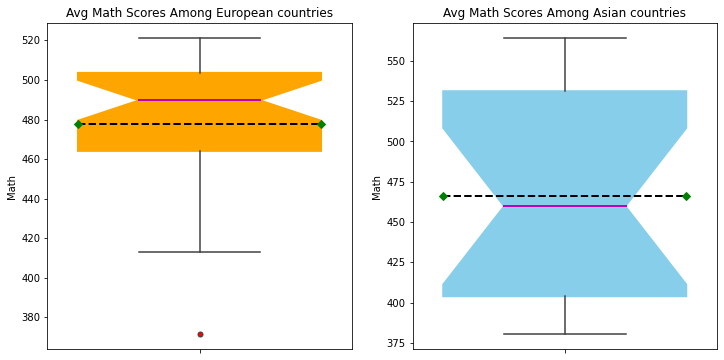

In [28]:
fig, ax = plt.subplots(nrows = 1, ncols=2, figsize=(12,6))

sns.boxplot(
    y=df[df.Continent_Code == 'EU']["Math"], 
    notch=True,               
    showmeans=True, meanline=True,
    meanprops=dict(lw=2, color='k', marker='D', mfc='g', mec='g'),
    medianprops={'lw': 2, 'color': 'm'},
    flierprops=dict(marker='o', mfc='r'),
    boxprops=dict(color='Orange'),
    ax=ax[0]
)

sns.boxplot(
    y=df[df.Continent_Code == 'AS']["Math"], 
    showmeans=True, meanline=True,
    meanprops=dict(lw=2, color='k', marker='D', mfc='g', mec='g'),
    medianprops={'lw': 2, 'color': 'm'},
    flierprops=dict(marker='o', mfc='r'),
    boxprops=dict(color='skyBlue'),
    notch=True,              
    ax=ax[1]
)

ax[0].set_title('Avg Math Scores Among European countries')
ax[1].set_title('Avg Math Scores Among Asian countries')

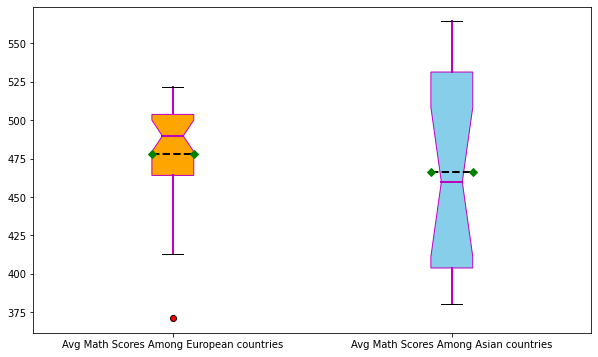

In [29]:
fig, ax = plt.subplots(figsize=(10,6))

ax.boxplot(
        (df[df.Continent_Code == 'EU']["Math"], df[df.Continent_Code == 'AS']["Math"]),              
        showmeans=True, meanline=True,
        meanprops=dict(lw=2, color='k', marker='D', mfc='g', mec='g'),
        medianprops={'lw': 2, 'color': 'm'},
        flierprops=dict(marker='o', mfc='r'),
        boxprops=dict(facecolor=('lightblue'), color='m'),
        whiskerprops=dict(lw=2, color='m'),
        notch=True, vert=True, patch_artist=True, 
        labels=('Avg Math Scores Among European countries', 'Avg Math Scores Among Asian countries')  
)

# change to colors
for patch,color in zip(ax.patches, ['Orange','skyBlue']):
    patch.set_facecolor(color)

plt.show()

## EXERCISE 4
A gym operator organized a 2-month exercise and diet program for 15 customers suffering from their excess weight. To evaluate whether this diet program was effective, he measured the customers' starting and ending weights and recorded them in the computer. Did the exercise and diet program have an impact on customers' weight loss? Use an α = .01 level test. [Weight Dataset](https://docs.google.com/spreadsheets/d/13hRZvtwno5pPULilCLB6EaQdDlkXvNkbVbfHzxJBVRU/edit#gid=0)

CHECK: statistic=2.67808348404993, pvalue=0.00900646517506627

In [30]:
starting = pd.Series([76, 81, 86, 71, 88, 78, 76, 81, 79, 77, 83, 77, 79, 81, 83])
ending   = pd.Series([72, 82, 84, 71, 83, 74, 70, 80, 78, 79, 80, 76, 77, 83, 82])

In [31]:
depTest = stats.ttest_rel(starting, ending, alternative='greater')
depTest

Ttest_relResult(statistic=2.6780834840499255, pvalue=0.00900646517506626)

In [32]:
alpha = 0.01

if depTest.pvalue < alpha:
    print("Reject the null")
else:
    print("fail to reject the null")

Reject the null
